## _ANALISIS EXPLORATORIO DE DATOS_
### _Empresa: TuGerente_
#### _Caso: 'Data_Analyst_Jr_Challenge'_
##### _Postulante: Flavia Maylin Davila Perez_

In [61]:
#Importamos todas las librerias que seran utiles para este proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import mplcyberpunk
sns.set_context('notebook')

In [2]:
import os
os.chdir('C:\\Users\\DELL\\Desktop\\TuGerente_reporte')

print(os.getcwd())

C:\Users\DELL\Desktop\TuGerente_reporte


In [3]:
#Cargamos el documento que contiene el dataset con el que trabajaremos,
#en este caso: 'Data_Analyst_Jr_Prueba_Corregida_Final'
files_csv = [
    "inversion.csv",
    "metricas.csv",
    "segmentacion.csv",
    "ventas.csv"
]
inversion_df = pd.read_csv(files_csv[0], delimiter=';')
metricas_df = pd.read_csv(files_csv[1], delimiter=';')
segmentacion_df = pd.read_csv(files_csv[2], delimiter=';')
ventas_df= pd.read_csv(files_csv[3], delimiter=';')

In [4]:
#Realizamos una exploracion inicial de los datos
inversion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Mes            24 non-null     object
 1   Facebook_Ads   24 non-null     int64 
 2   Instagram_Ads  24 non-null     int64 
 3   Twitter_Ads    24 non-null     int64 
 4   LinkedIn_Ads   24 non-null     int64 
 5   TikTok_Ads     24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [5]:
metricas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mes                   24 non-null     object 
 1   Facebook_Likes        24 non-null     float64
 2   Instagram_Followers   24 non-null     float64
 3   Twitter_Followers     24 non-null     float64
 4   LinkedIn_Connections  24 non-null     float64
 5   TikTok_Followers      24 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.3+ KB


In [6]:
segmentacion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Cliente_ID      100 non-null    int64 
 1   Segmento        100 non-null    object
 2   Ventas_Cliente  100 non-null    int64 
 3   Mes_Venta       100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


In [7]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Mes             24 non-null     object
 1   Ventas_Totales  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 516.0+ bytes


_*Podemos observar que las columnas de mes estan en formato 'object', necesitamos convertir estos datos a tipo 'date'_

In [8]:
def str_to_date(df, columna):
    df[columna] = pd.to_datetime(df[columna], format='%b %Y', errors='coerce')
    return df

#inversion_df
str_to_date(inversion_df, 'Mes')
inversion_df['Mes'] = pd.to_datetime(inversion_df['Mes'], format='%m-%Y')

#metricas_df
str_to_date(metricas_df, 'Mes')
metricas_df['Mes'] = pd.to_datetime(metricas_df['Mes'], format='%m-%Y')

#ventas_df
str_to_date(ventas_df, 'Mes')
ventas_df['Mes'] = pd.to_datetime(ventas_df['Mes'], format='%m-%Y')

#segmentacion_df
str_to_date(segmentacion_df, 'Mes_Venta')
segmentacion_df['Mes_Venta'] = pd.to_datetime(segmentacion_df['Mes_Venta'], format='%m-%Y')

_En este caso se está asumiendo que los valores de las variables de la dimension 'metricas_df' son promedios mensuales, debido a que
siendo que se trata de 'likes', 'followers' y 'conecctions' hablamos de una variable numerica discreta pero los datos proporcionados 
por mes son de tipo decimal, lo que sugiere que podria tratarse de un promedio (float),con propositos de practicidad casteamos los datos a tipo 'int'_

In [9]:
# Se castea el columnas de la dimension 'metricas_df' como 'int'

# Facebook_Likes
metricas_df['Facebook_Likes'] = metricas_df['Facebook_Likes'].astype('int')

# Instagram_Followers
metricas_df['Instagram_Followers'] = metricas_df['Instagram_Followers'].astype('int')

# Twitter_Followers
metricas_df['Twitter_Followers'] = metricas_df['Twitter_Followers'].astype('int')

# LinkedIn_Conecctions
metricas_df['LinkedIn_Connections'] = metricas_df['LinkedIn_Connections'].astype('int')

# TikTook_Folowers
metricas_df['TikTok_Followers'] = metricas_df['TikTok_Followers'].astype('int')


In [10]:
# Casteamos la variable 'Clientes_ID' como 'object'
segmentacion_df['Cliente_ID'] = segmentacion_df['Cliente_ID'].astype('str')

Para simplificar y facilitar el uso y comprensión de los datos en la tabla 'segmentacion_df', podemos agrupar la información, permitiendo así una representación más clara y manejable, ademas poder incuir la tabla al unir los datos

In [11]:
pivot_segmentacion_df = segmentacion_df.pivot_table(index='Mes_Venta', columns='Segmento', values='Ventas_Cliente', aggfunc='sum')
pivot_segmentacion_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2022-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       18 non-null     float64
 1   B       21 non-null     float64
 2   C       21 non-null     float64
dtypes: float64(3)
memory usage: 768.0 bytes


Observamos valores 'Nan', procedemos a llenar estos valores con 0 para tener consistencia en los datos

In [12]:
pivot_segmentacion_df['A'] = pivot_segmentacion_df['A'].fillna(0)
pivot_segmentacion_df['B'] = pivot_segmentacion_df['B'].fillna(0)
pivot_segmentacion_df['C'] = pivot_segmentacion_df['C'].fillna(0)
pivot_segmentacion_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2022-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       24 non-null     float64
 1   B       24 non-null     float64
 2   C       24 non-null     float64
dtypes: float64(3)
memory usage: 768.0 bytes


In [13]:
# Renombramos las columnas para tener claros sus valores
pivot_segmentacion_df = pivot_segmentacion_df.rename(columns={'A': 'Ventas_Seg_A', 'B': 'Ventas_Seg_B', 'C': 'Ventas_Seg_C'})

La variable 'Ventas_Totales' de la dimension 'ventas_df' debe ser de tipo float, ya que se trata de una variable que representa montos monetarios, casteamos a tipo 'float'

In [14]:
#se castea el 'Ventas_Totales' como 'float'
ventas_df['Ventas_Totales'] = ventas_df['Ventas_Totales'].astype('float')
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Mes             24 non-null     datetime64[ns]
 1   Ventas_Totales  24 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 516.0 bytes


## _UNIÓN DE LOS DATOS_ 

Ahora que contamos con todas las tablas con un correcto formato procedemos a unir las tablas mediante el
identificador en comun que en este caso es 'Mes' ('Mes_Ventas' en segmentacion_df)

In [15]:
social_media_df = metricas_df.merge(inversion_df, on = 'Mes')\
                                    .merge(pivot_segmentacion_df, left_on='Mes', right_on='Mes_Venta')\
                                    .merge(ventas_df, on = 'Mes')

#Consideraremos la tabla 'metricas_df' como nuestra tabla de hechos principal, 
#ya que será el punto focal para el análisis destinado a obtener insights estratégicos para marketing.

In [16]:
social_media_df.shape

(24, 15)

In [17]:
social_media_df.head()

,Mes,Facebook_Likes,Instagram_Followers,Twitter_Followers,LinkedIn_Connections,TikTok_Followers,Facebook_Ads,Instagram_Ads,Twitter_Ads,LinkedIn_Ads,TikTok_Ads,Ventas_Seg_A,Ventas_Seg_B,Ventas_Seg_C,Ventas_Totales
0,2022-01-01,3642,4147,1241,1999,1686,1698,2227,589,1040,881,21025.0,19851.0,18844.0,59720.0
1,2022-02-01,3459,3841,1497,2562,1143,1851,1779,859,1375,658,15283.0,27393.0,13065.0,55741.0
2,2022-03-01,3260,4284,1085,2883,2024,1744,1936,586,1387,864,13127.0,7474.0,0.0,20601.0
3,2022-04-01,2252,3293,1926,1525,2202,1108,1703,895,957,992,0.0,-1124002.0,0.0,-1124002.0
4,2022-05-01,3030,2802,1857,2745,2014,1599,1535,961,1251,844,33778.0,11504.0,19545.0,64827.0


In [18]:
social_media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Mes                   24 non-null     datetime64[ns]
 1   Facebook_Likes        24 non-null     int32         
 2   Instagram_Followers   24 non-null     int32         
 3   Twitter_Followers     24 non-null     int32         
 4   LinkedIn_Connections  24 non-null     int32         
 5   TikTok_Followers      24 non-null     int32         
 6   Facebook_Ads          24 non-null     int64         
 7   Instagram_Ads         24 non-null     int64         
 8   Twitter_Ads           24 non-null     int64         
 9   LinkedIn_Ads          24 non-null     int64         
 10  TikTok_Ads            24 non-null     int64         
 11  Ventas_Seg_A          24 non-null     float64       
 12  Ventas_Seg_B          24 non-null     float64       
 13  Ventas_Seg_C          

In [19]:
social_media_df.columns

Index(['Mes', 'Facebook_Likes', 'Instagram_Followers', 'Twitter_Followers',
       'LinkedIn_Connections', 'TikTok_Followers', 'Facebook_Ads',
       'Instagram_Ads', 'Twitter_Ads', 'LinkedIn_Ads', 'TikTok_Ads',
       'Ventas_Seg_A', 'Ventas_Seg_B', 'Ventas_Seg_C', 'Ventas_Totales'],
      dtype='object')

## _ANALISIS EXPLORATORIO DE LOS DATOS_

### _Medidas de Tendenca Central_

Obtenemos una tabal resumen para poder ver las medidas de tendencia central de nuestras variables y de igual manera su dispersion con las medidas de dispersión

In [20]:
social_media_df.describe().round(2)

,Mes,Facebook_Likes,Instagram_Followers,Twitter_Followers,LinkedIn_Connections,TikTok_Followers,Facebook_Ads,Instagram_Ads,Twitter_Ads,LinkedIn_Ads,TikTok_Ads,Ventas_Seg_A,Ventas_Seg_B,Ventas_Seg_C,Ventas_Totales
count,24,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,2022-12-16 00:00:00,3044.88,3868.71,1437.58,2216.00,1804.83,1526.88,1928.79,754.92,1142.83,906.29,19312.71,-31303.38,16527.00,4536.33
min,2022-01-01 00:00:00,2026.00,2802.00,776.00,1234.00,1088.00,1053.00,1526.00,536.00,828.00,658.00,0.00,-1124002.00,0.00,-1124002.00
25%,2022-06-23 12:00:00,2690.00,3452.50,1215.75,1982.00,1537.50,1331.25,1740.50,592.75,976.75,785.25,5210.25,7355.75,7930.25,29103.25
50%,2022-12-16 12:00:00,3032.50,3758.50,1432.00,2139.50,1741.50,1600.50,1900.00,755.50,1144.00,881.00,14975.00,13468.00,13969.50,52387.50
75%,2023-06-08 12:00:00,3456.00,4301.50,1679.75,2563.00,2110.50,1709.50,2210.50,873.75,1296.25,1000.75,25381.00,20410.75,19509.75,66924.50
max,2023-12-01 00:00:00,4061.00,4815.00,2157.00,3025.00,2475.00,1904.00,2477.00,961.00,1477.00,1186.00,71613.00,52708.00,66305.00,111281.00
std,NaN,528.88,586.61,340.09,475.64,399.98,269.03,285.47,139.84,197.36,157.03,19389.02,233045.52,13895.96,241883.93


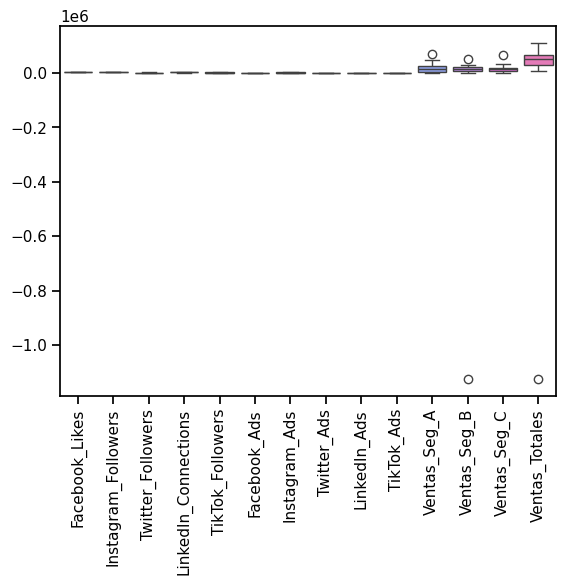

In [21]:
quantitatives = ['Facebook_Likes', 'Instagram_Followers', 'Twitter_Followers',
       'LinkedIn_Connections', 'TikTok_Followers', 'Facebook_Ads',
       'Instagram_Ads', 'Twitter_Ads', 'LinkedIn_Ads', 'TikTok_Ads',
       'Ventas_Seg_A', 'Ventas_Seg_B', 'Ventas_Seg_C', 'Ventas_Totales']

base = social_media_df[quantitatives]
sns.boxplot(data=base)
plt.xticks(ticks=range(len(quantitatives)), rotation=90)


plt.show()

_Podemos observar que tenemos 2 valores negativos en las variables 'Ventas_Seg_B' y debido a ello en 'Ventas_Totales', esto podria afectar a la  relacion entre Inversion y Ventas, ademas que no es un valor representativo de los datos. Tratamos el valor atipico reemplazando con el valor de la mediana de la columna, pero guardando el resultado en un Data Frame distinto solo con el fin de encontrar relacion en los datos mas adelante_

In [22]:
# Calculamos las medianas correspondientes
median_ventas = social_media_df['Ventas_Totales'].median()
median_ventasB = social_media_df['Ventas_Seg_B'].median()

# Creamos una copia del DataFrame original
social_media_df_1 = social_media_df.copy()

# Reemplazar los valores negativos con la mediana en la copia
social_media_df_1.loc[social_media_df_1['Ventas_Totales'] < 0, 'Ventas_Totales'] = median_ventas
social_media_df_1.loc[social_media_df_1['Ventas_Seg_B'] < 0, 'Ventas_Seg_B'] = median_ventasB

### _Analisis Univariado_
#### _1. Variables Cualitativas_

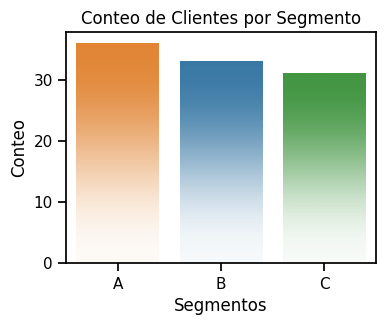

In [23]:
#la unica variable cualitativa con la que se cuenta es 'Segmento', que se encuentra en nuestra tabla 'segmentacion_df'
fig = plt.figure(figsize=(4, 3))

ax0 = sns.countplot(x='Segmento', hue='Segmento', data=segmentacion_df, order=['A', 'B', 'C'])
ax0.set_title('Conteo de Clientes por Segmento')
ax0.set(xlabel='Segmentos', 
        ylabel='Conteo')
bars = ax0.patches
mplcyberpunk.add_bar_gradient(bars=bars)

plt.show()

En este grafico podemos observar que la mayoria de los clientes pertenecen al Segmneto A

In [24]:
# Contamos los clientes por segmento
count_seg = segmentacion_df['Segmento'].value_counts()
print(count_seg)

Segmento
A    36
B    33
C    31
Name: count, dtype: int64


Contando los datos por segmento observamos que la cantidad de clientes que pertenecen a la categoria A son 36

### _Encontramos el Mes donde se obtuvieron mas ventas de cada Año_

In [25]:
# Creamos un dataframe con las ventas del 2022
ventas_df_22 = segmentacion_df[segmentacion_df['Mes_Venta'].dt.year == 2022]
ventas_df_22 = ventas_df_22.sort_values('Mes_Venta')

# Creamos un dataframe con las ventas del 2023
ventas_df_23 = segmentacion_df[ segmentacion_df['Mes_Venta'].dt.year == 2023]
ventas_df_23 = ventas_df_23.sort_values('Mes_Venta')

In [26]:
ventas_mes_22 = ventas_df_22.groupby('Mes_Venta')['Cliente_ID'].count()
top_month_22 = ventas_mes_22.idxmax()
ventas_maximas_22 = ventas_mes_22.max()

print(f"Mes con mas ventas en el año 2022: {top_month_22}")
print(f"Numero de ventas: {ventas_maximas_22}")

Mes con mas ventas en el año 2022: 2022-07-01 00:00:00
Numero de ventas: 7


In [27]:
ventas_mes_23 = ventas_df_23.groupby('Mes_Venta')['Cliente_ID'].count()
top_month_23 = ventas_mes_23.idxmax()
ventas_maximas_23 = ventas_mes_23.max()

print(f"Mes con mas ventas en el año 2023: {top_month_23}")
print(f"Numero de ventas: {ventas_maximas_23}")

Mes con mas ventas en el año 2023: 2023-05-01 00:00:00
Numero de ventas: 7


In [28]:
# Encontramos el monto mas alto por venta por cliente en cada año
venta_max_22 = ventas_df_22['Ventas_Cliente'].max()
venta_max_23 = ventas_df_23['Ventas_Cliente'].max()

# Localizamos el Cliente_ID con la venta más alta cada año
cliente_max_22 = ventas_df_22.loc[ventas_df_22['Ventas_Cliente'] == venta_max_22, 'Cliente_ID'].values[0]
cliente_max_23 = ventas_df_23.loc[ventas_df_23['Ventas_Cliente'] == venta_max_23, 'Cliente_ID'].values[0]

# Localizamos el mes donde se obtuvo cada venta
mes_max_22 = ventas_df_22.loc[ventas_df_22['Ventas_Cliente'] == venta_max_22, 'Mes_Venta'].values[0]
mes_max_23 = ventas_df_23.loc[ventas_df_23['Ventas_Cliente'] == venta_max_23, 'Mes_Venta'].values[0]


print(f"Cliente con el monto de venta más alto en 2022: {cliente_max_22}")
print(f"El monto maximo de ventas que se realizo en el año 2022 fue: {venta_max_22} Bs.")
print(f"El mes donde se realizo la venta con el monto mas alto en el año 2022 fue: {mes_max_22}")
print()
print(f"Cliente con el monto de venta más alto en 2023: {cliente_max_23}")
print(f"El monto maximo de ventas que se realizo en el año 2023 fue: {venta_max_23} Bs.")
print(f"El mes donde se realizo la venta con el monto mas alto en el año 2023 fue: {mes_max_23}")

Cliente con el monto de venta más alto en 2022: 69
El monto maximo de ventas que se realizo en el año 2022 fue: 19851 Bs.
El mes donde se realizo la venta con el monto mas alto en el año 2022 fue: 2022-01-01T00:00:00.000000000

Cliente con el monto de venta más alto en 2023: 48
El monto maximo de ventas que se realizo en el año 2023 fue: 19860 Bs.
El mes donde se realizo la venta con el monto mas alto en el año 2023 fue: 2023-12-01T00:00:00.000000000


#### _2. Variables Cuantitativas_

Contamos con 14 variales cuantitativas

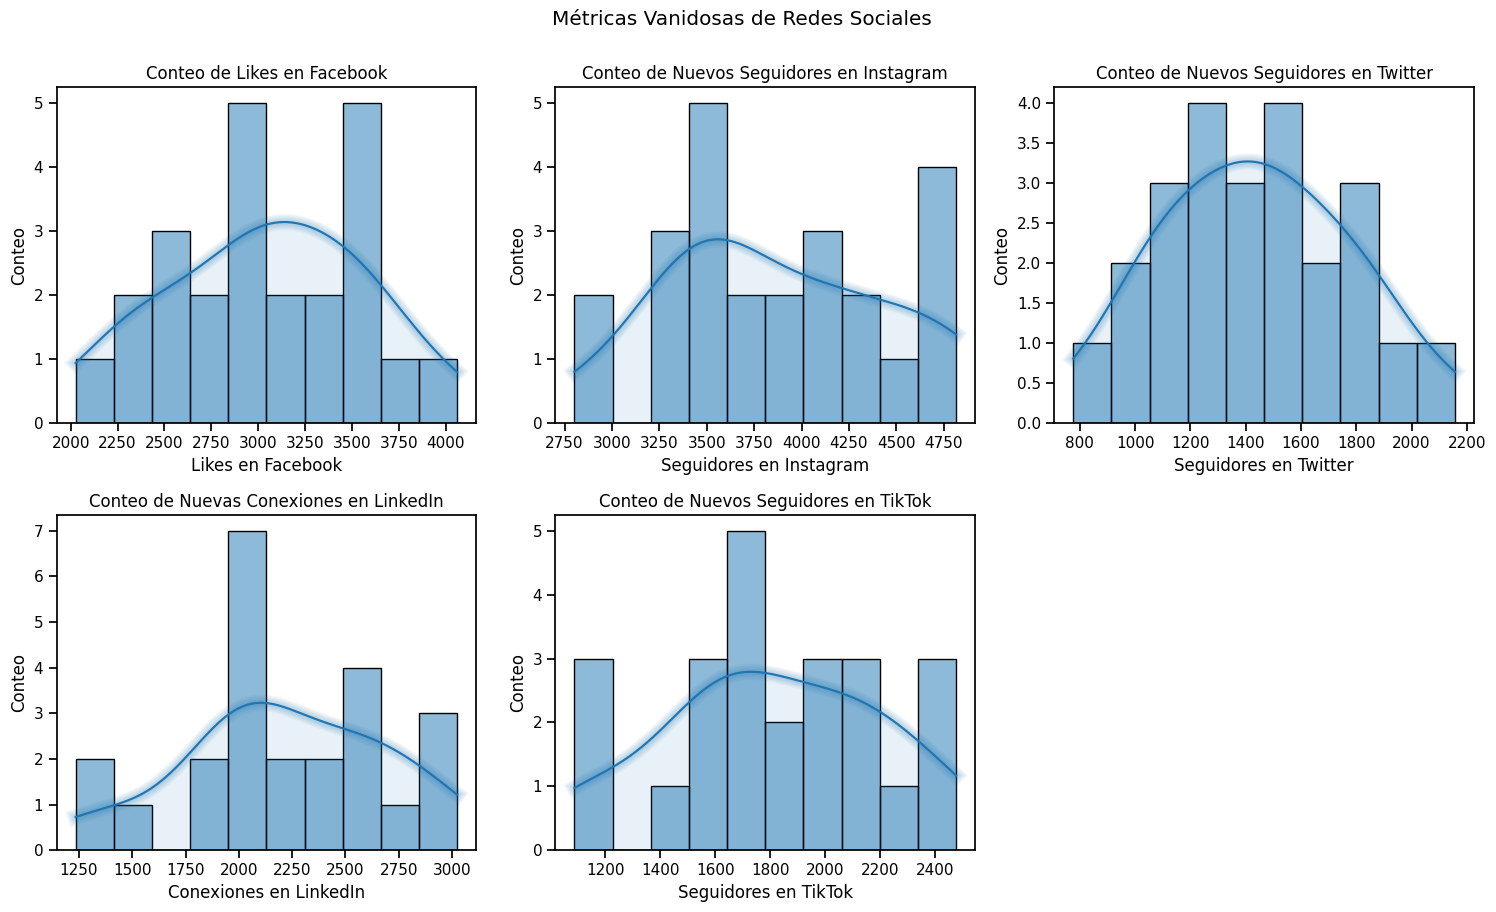

In [29]:
fig = plt.figure(figsize=(15, 10))

# Distribucion Likes obtenidos en Facebook
ax1 = fig.add_subplot(2, 3, 1)
sns.histplot(social_media_df['Facebook_Likes'], kde=True, ax=ax1, bins=10)
ax1.set_title('Conteo de Likes en Facebook')
ax1.set(xlabel='Likes en Facebook', ylabel='Conteo')
mplcyberpunk.add_glow_effects()

# Distribucion Seguidores obtenidos en Instagram
ax2 = fig.add_subplot(2, 3, 2)
sns.histplot(social_media_df['Instagram_Followers'], kde=True, ax=ax2, bins=10)
ax2.set_title('Conteo de Nuevos Seguidores en Instagram')
ax2.set(xlabel='Seguidores en Instagram', ylabel='Conteo')
mplcyberpunk.add_glow_effects()

# Distribucion Seguidores obtenidos en Twitter
ax3 = fig.add_subplot(2, 3, 3)
sns.histplot(social_media_df['Twitter_Followers'], kde=True, ax=ax3, bins=10)
ax3.set_title('Conteo de Nuevos Seguidores en Twitter')
ax3.set(xlabel='Seguidores en Twitter', ylabel='Conteo')
mplcyberpunk.add_glow_effects()

# Distribucion Conexiones  obtenidas en LinkedIn
ax4 = fig.add_subplot(2, 3, 4)
sns.histplot(social_media_df['LinkedIn_Connections'], kde=True, ax=ax4, bins=10)
ax4.set_title('Conteo de Nuevas Conexiones en LinkedIn')
ax4.set(xlabel='Conexiones en LinkedIn', ylabel='Conteo')
mplcyberpunk.add_glow_effects()

# Distribucion Seguidores obtenidos en TikTok
ax5 = fig.add_subplot(2, 3, 5)
sns.histplot(social_media_df['TikTok_Followers'], kde=True, ax=ax5, bins=10)
ax5.set_title('Conteo de Nuevos Seguidores en TikTok')
ax5.set(xlabel='Seguidores en TikTok', ylabel='Conteo')
mplcyberpunk.add_glow_effects()

fig.suptitle('Métricas Vanidosas de Redes Sociales', y=0.91)
plt.tight_layout(rect=[0, 0, 1, 0.91]) 
plt.show()

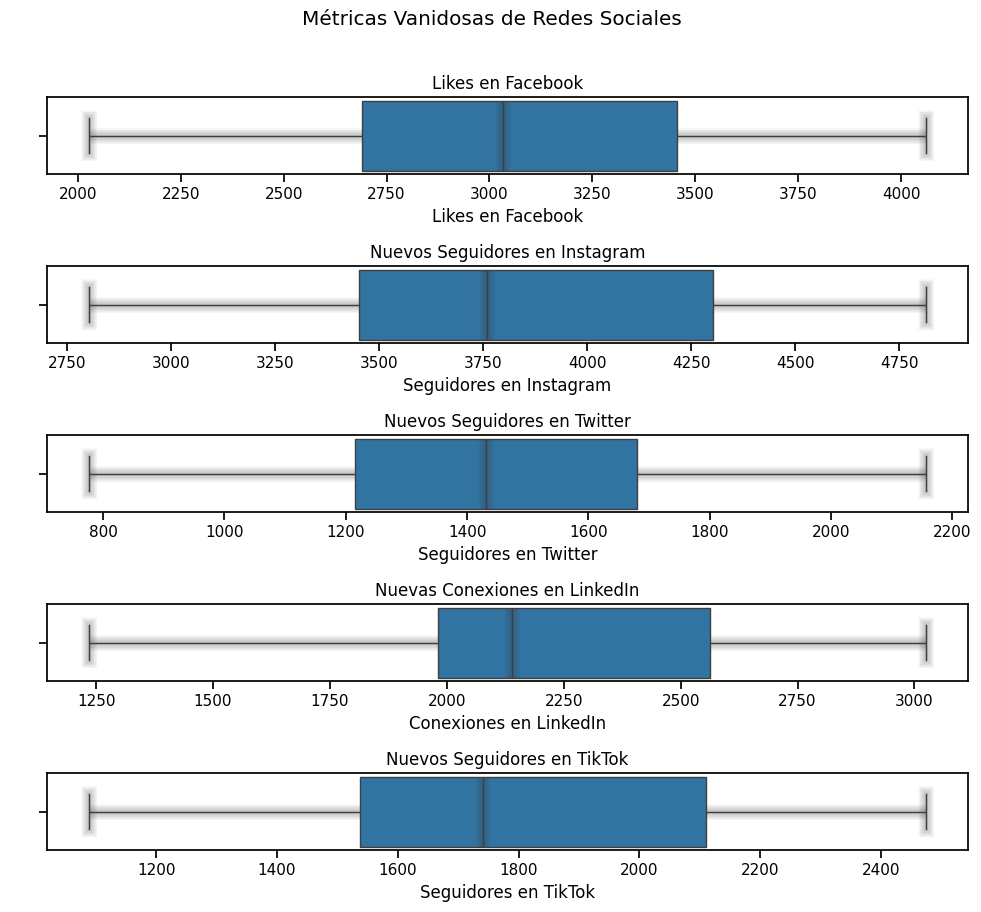

In [30]:
fig = plt.figure(figsize=(10, 10))

# Distribucion Likes obtenidos en Facebook
ax1 = fig.add_subplot(5, 1, 1)
sns.boxplot(x=social_media_df['Facebook_Likes'], ax=ax1, orient='h')
ax1.set_title('Likes en Facebook')
ax1.set(xlabel='Likes en Facebook', ylabel=' ')
mplcyberpunk.add_glow_effects()

# Distribucion Seguidores obtenidos en Instagram
ax2 = fig.add_subplot(5, 1, 2)
sns.boxplot(x=social_media_df['Instagram_Followers'], ax=ax2, orient='h')
ax2.set_title('Nuevos Seguidores en Instagram')
ax2.set(xlabel='Seguidores en Instagram', ylabel=' ')
mplcyberpunk.add_glow_effects()

# Distribucion Seguidores obtenidos en Twitter
ax3 = fig.add_subplot(5, 1, 3)
sns.boxplot(x=social_media_df['Twitter_Followers'], ax=ax3, orient='h')
ax3.set_title('Nuevos Seguidores en Twitter')
ax3.set(xlabel='Seguidores en Twitter', ylabel=' ')
mplcyberpunk.add_glow_effects()

# Distribucion Conexiones  obtenidas en LinkedIn
ax4 = fig.add_subplot(5, 1, 4)
sns.boxplot(x=social_media_df['LinkedIn_Connections'], ax=ax4, orient='h')
ax4.set_title('Nuevas Conexiones en LinkedIn')
ax4.set(xlabel='Conexiones en LinkedIn', ylabel=' ')
mplcyberpunk.add_glow_effects()

# Distribucion Seguidores obtenidos en TikTok
ax5 = fig.add_subplot(5, 1, 5)
sns.boxplot(x=social_media_df['TikTok_Followers'], ax=ax5, orient='h')
ax5.set_title('Nuevos Seguidores en TikTok')
ax5.set(xlabel='Seguidores en TikTok', ylabel=' ')
mplcyberpunk.add_glow_effects()

fig.suptitle('Métricas Vanidosas de Redes Sociales', y=0.91)
plt.tight_layout(rect=[0, 0, 1, 0.90]) 
plt.show()



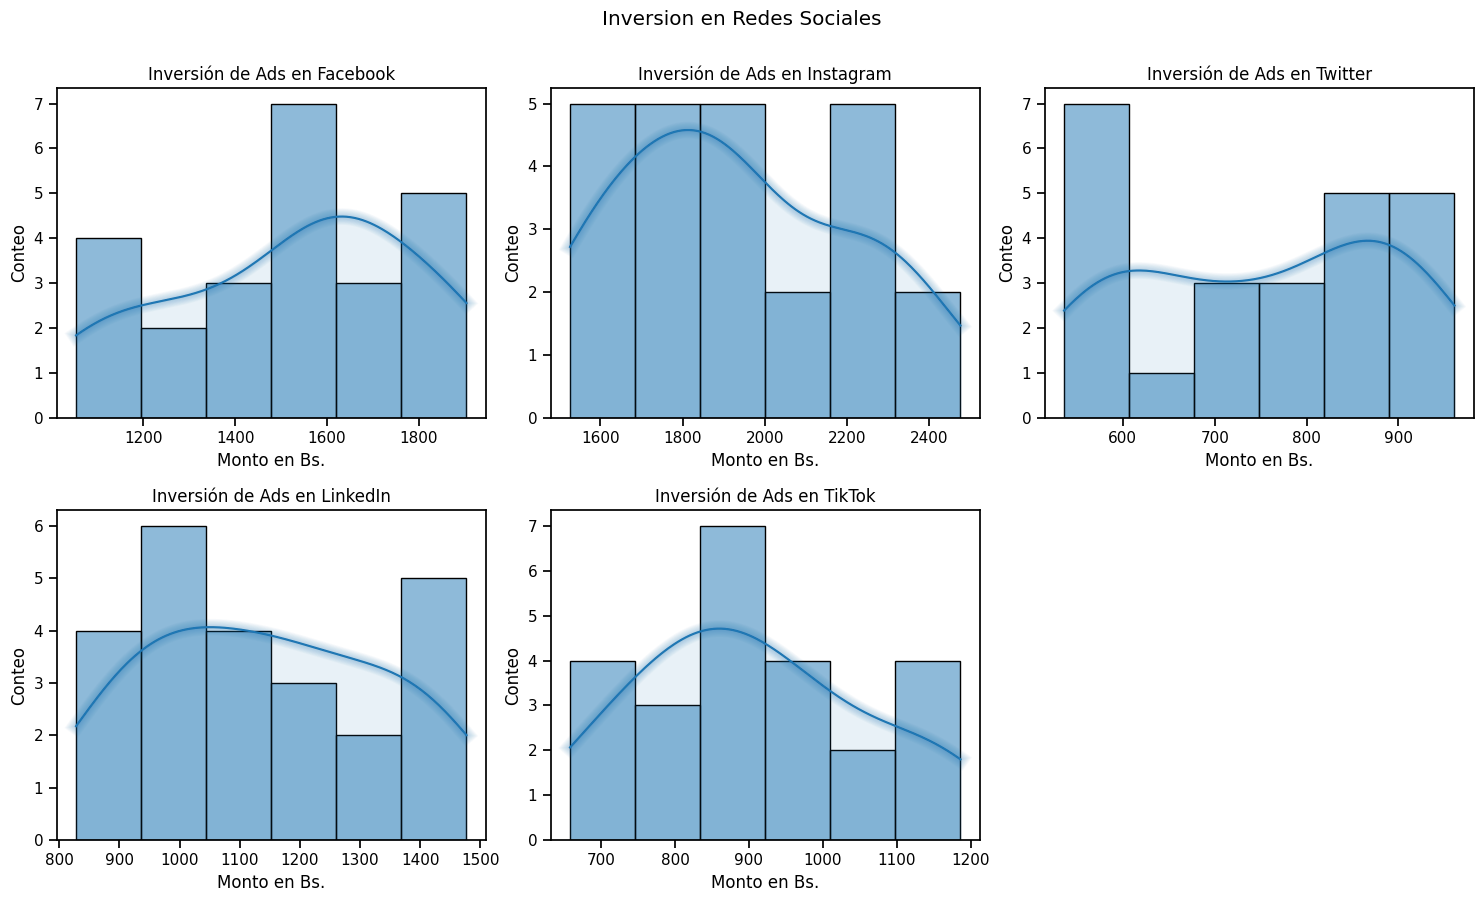

In [31]:
fig = plt.figure(figsize=(15, 10))

# Distribucion de inversion en Facebook
ax1 = fig.add_subplot(2, 3, 1)
sns.histplot(social_media_df['Facebook_Ads'], kde=True, ax=ax1)
ax1.set_title('Inversión de Ads en Facebook')
ax1.set(xlabel='Monto en Bs.', ylabel='Conteo')
mplcyberpunk.add_glow_effects()

# Distribucion de inversion en Instagram
ax2 = fig.add_subplot(2, 3, 2)
sns.histplot(social_media_df['Instagram_Ads'], kde=True, ax=ax2)
ax2.set_title('Inversión de Ads en Instagram')
ax2.set(xlabel='Monto en Bs.', ylabel='Conteo')
mplcyberpunk.add_glow_effects()

# Distribucion de inversion en Twitter
ax3 = fig.add_subplot(2, 3, 3)
sns.histplot(social_media_df['Twitter_Ads'], kde=True, ax=ax3)
ax3.set_title('Inversión de Ads en Twitter')
ax3.set(xlabel='Monto en Bs.', ylabel='Conteo')
mplcyberpunk.add_glow_effects()

# Distribucion de inversion en LinkedIn
ax4 = fig.add_subplot(2, 3, 4)
sns.histplot(social_media_df['LinkedIn_Ads'], kde=True, ax=ax4)
ax4.set_title('Inversión de Ads en LinkedIn')
ax4.set(xlabel='Monto en Bs.', ylabel='Conteo')
mplcyberpunk.add_glow_effects()

# Distribucion de inversion en TikTok
ax5 = fig.add_subplot(2, 3, 5)
sns.histplot(social_media_df['TikTok_Ads'], kde=True, ax=ax5)
ax5.set_title('Inversión de Ads en TikTok')
ax5.set(xlabel='Monto en Bs.', ylabel='Conteo')
mplcyberpunk.add_glow_effects()

fig.suptitle('Inversion en Redes Sociales', y=0.90)
plt.tight_layout(rect=[0, 0, 1, 0.90]) 
plt.show()

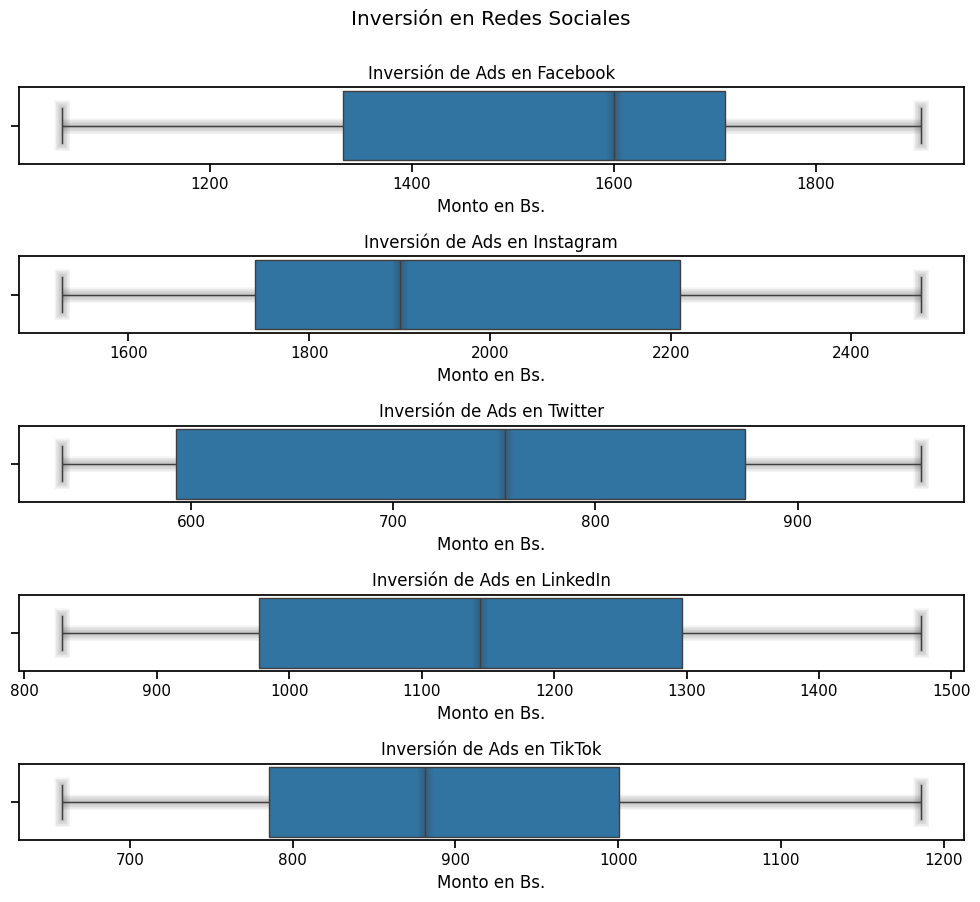

In [32]:
fig = plt.figure(figsize=(10, 10))

# Distribucion de inversion en Facebook
ax1 = fig.add_subplot(5, 1, 1)
sns.boxplot(x=social_media_df['Facebook_Ads'], ax=ax1, orient='h')
ax1.set_title('Inversión de Ads en Facebook')
ax1.set(xlabel='Monto en Bs.')
mplcyberpunk.add_glow_effects()

# Distribucion de inversion en Instagram
ax2 = fig.add_subplot(5, 1, 2)
sns.boxplot(x=social_media_df['Instagram_Ads'], ax=ax2, orient='h')
ax2.set_title('Inversión de Ads en Instagram')
ax2.set(xlabel='Monto en Bs.')
mplcyberpunk.add_glow_effects()

# Distribucion de inversion en Twitter
ax3 = fig.add_subplot(5, 1, 3)
sns.boxplot(x=social_media_df['Twitter_Ads'], ax=ax3, orient='h')
ax3.set_title('Inversión de Ads en Twitter')
ax3.set(xlabel='Monto en Bs.')
mplcyberpunk.add_glow_effects()

# Distribucion de inversion en LinkedIn
ax4 = fig.add_subplot(5, 1, 4)
sns.boxplot(x=social_media_df['LinkedIn_Ads'], ax=ax4, orient='h')
ax4.set_title('Inversión de Ads en LinkedIn')
ax4.set(xlabel='Monto en Bs.')
mplcyberpunk.add_glow_effects()

# Distribucion de inversion en TikTok
ax5 = fig.add_subplot(5, 1, 5)
sns.boxplot(x=social_media_df['TikTok_Ads'], ax=ax5, orient='h')
ax5.set_title('Inversión de Ads en TikTok')
ax5.set(xlabel='Monto en Bs.')
mplcyberpunk.add_glow_effects()

fig.suptitle('Inversión en Redes Sociales', y=0.90)
plt.tight_layout(rect=[0, 0, 1, 0.90]) 
plt.show()



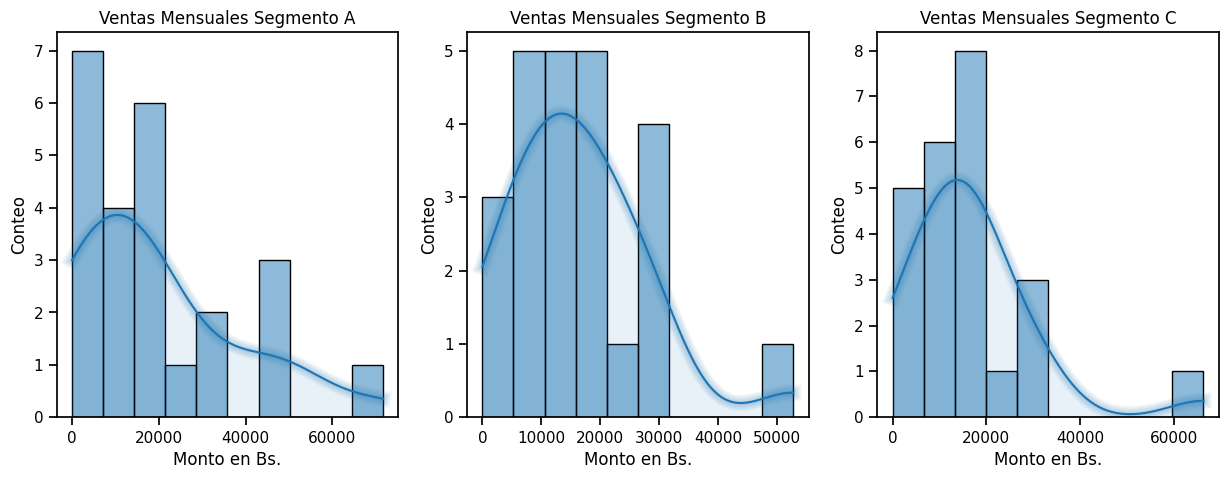

In [33]:
# Ya que el outlier no es representativo de nuestros datos utilizamos el data frame creado con los outliers negativos tratados 'social_media_df_1'

fig = plt.figure(figsize=(15, 5))

# Distribucion de Ventas por Segmento A
ax1 = fig.add_subplot(1, 3, 1)
sns.histplot(social_media_df_1['Ventas_Seg_A'], kde=True, ax=ax1, bins=10)
ax1.set_title('Ventas Mensuales Segmento A')
ax1.set(xlabel='Monto en Bs.', ylabel='Conteo')
mplcyberpunk.add_glow_effects()

# Distribucion de Ventas por Segmento B
ax2 = fig.add_subplot(1, 3, 2)
sns.histplot(social_media_df_1['Ventas_Seg_B'], kde=True, ax=ax2, bins=10)
ax2.set_title('Ventas Mensuales Segmento B')
ax2.set(xlabel='Monto en Bs.', ylabel='Conteo')
mplcyberpunk.add_glow_effects()

# Distribucion de Ventas por Segmento C
ax3 = fig.add_subplot(1, 3, 3)
sns.histplot(social_media_df_1['Ventas_Seg_C'], kde=True, ax=ax3, bins=10)
ax3.set_title('Ventas Mensuales Segmento C')
ax3.set(xlabel='Monto en Bs.', ylabel='Conteo')
mplcyberpunk.add_glow_effects()

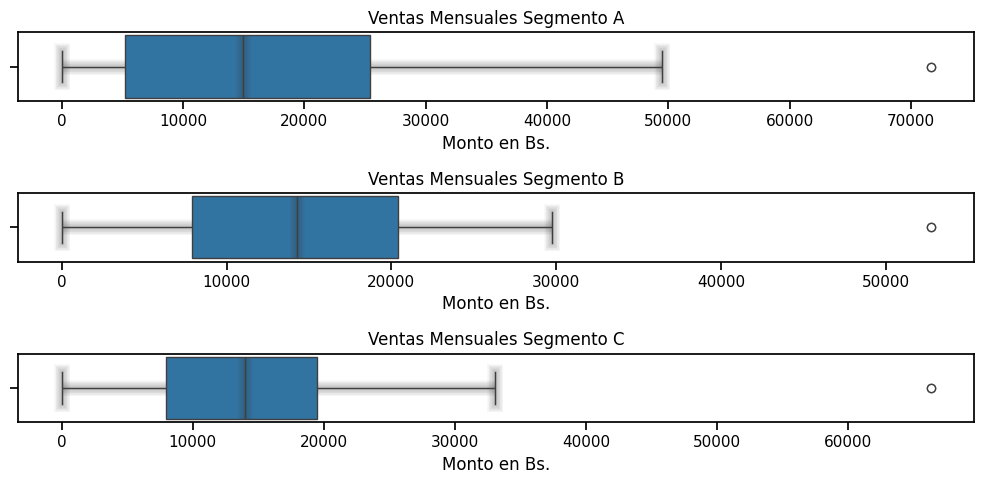

In [34]:
fig = plt.figure(figsize=(10, 5))
# Ya que el outlier no es representativo de nuestros datos utilizamos el data frame creado con los outliers negativos tratados 'social_media_df_1'

# Distribucion de Ventas por Segmento A
ax1 = fig.add_subplot(3, 1, 1)
sns.boxplot(x=social_media_df_1['Ventas_Seg_A'], ax=ax1, orient='h')
ax1.set_title('Ventas Mensuales Segmento A')
ax1.set(xlabel='Monto en Bs.')
mplcyberpunk.add_glow_effects()

# Distribucion de Ventas por Segmento B
ax2 = fig.add_subplot(3, 1, 2)
sns.boxplot(x=social_media_df_1['Ventas_Seg_B'], ax=ax2, orient='h')
ax2.set_title('Ventas Mensuales Segmento B')
ax2.set(xlabel='Monto en Bs.')
mplcyberpunk.add_glow_effects()

# Distribucion de Ventas por Segmento C
ax3 = fig.add_subplot(3, 1, 3)
sns.boxplot(x=social_media_df_1['Ventas_Seg_C'], ax=ax3, orient='h')
ax3.set_title('Ventas Mensuales Segmento C')
ax3.set(xlabel='Monto en Bs.')
mplcyberpunk.add_glow_effects()

plt.tight_layout()
plt.show()


### _Analisis Bivariado_
#### _1. Variables Cualitativas_

In [35]:
# Creamos un dataframe con las ventas del 2022
ventas_df_22 = segmentacion_df[segmentacion_df['Mes_Venta'].dt.year == 2022]
ventas_df_22 = ventas_df_22.sort_values('Mes_Venta')

# Creamos un dataframe con las ventas del 2023
ventas_df_23 = segmentacion_df[ segmentacion_df['Mes_Venta'].dt.year == 2023]
ventas_df_23 = ventas_df_23.sort_values('Mes_Venta')

In [36]:
months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

In [37]:
ventas_totales = ventas_df_22.groupby(['Segmento'])['Cliente_ID', ].count().reset_index()
print(ventas_totales)

  Segmento  Cliente_ID
0        A          17
1        B          16
2        C          14


In [38]:
# Creamos tablas pivot
conteo_clientes_22 = ventas_df_22.groupby(['Mes_Venta', 'Segmento']).size().reset_index(name='Conteo_Clientes')
conteo_clientes_23 = ventas_df_23.groupby(['Mes_Venta', 'Segmento']).size().reset_index(name='Conteo_Clientes')

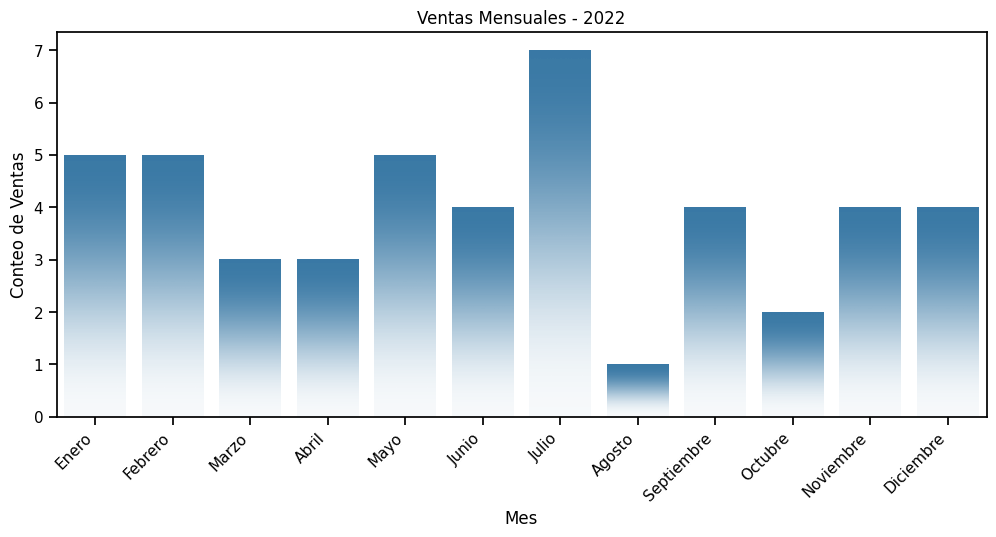

In [39]:
fig_bivar = plt.figure(figsize=(12, 5))
seg_order = ['A', 'B', 'C']

# Conteo promedio de ventas realizadas por mes en el año 2022

ventas_22_pivot= conteo_clientes_22.pivot_table(index='Mes_Venta', values='Conteo_Clientes', aggfunc='sum').reset_index()
ventas_22_pivot.columns = ['Mes_Venta', 'Total_Conteo_Clientes']

seg22 = fig_bivar.add_subplot(1, 1, 1)
sns.barplot(x='Mes_Venta', y='Total_Conteo_Clientes', data=ventas_22_pivot, ax=seg22, errorbar=None)
seg22.set_title('Ventas Mensuales - 2022')
seg22.set(xlabel='Mes', ylabel='Conteo de Ventas')
seg22.set_xticks(range(len(months)))
seg22.set_xticklabels(months, rotation=45, ha='right')
bars = seg22.patches
mplcyberpunk.add_bar_gradient(bars=bars)

plt.show()

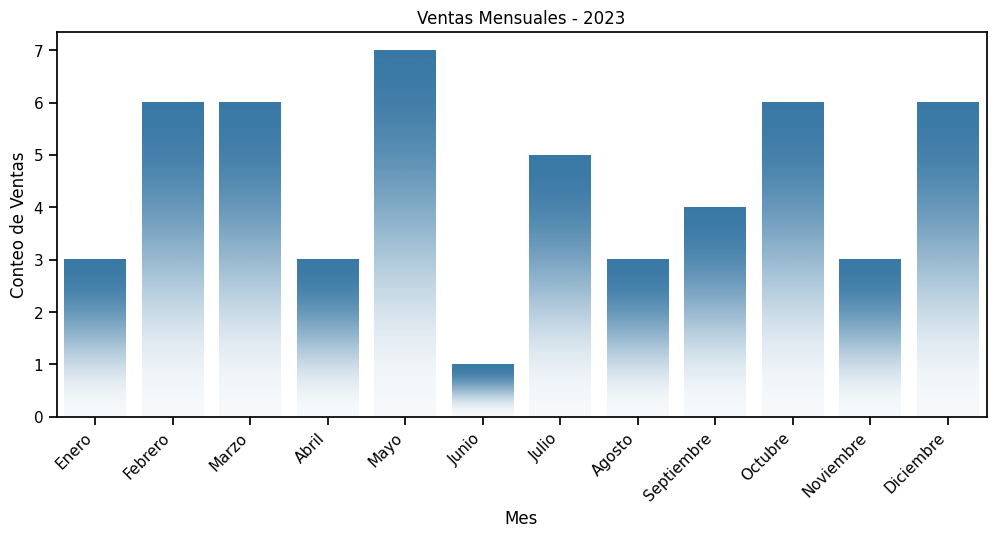

In [40]:
fig_bivar = plt.figure(figsize=(12, 5))
seg_order = ['A', 'B', 'C']

# Conteo de ventas realizadas por mes el año 2023

ventas_23_pivot= conteo_clientes_23.pivot_table(index='Mes_Venta', values='Conteo_Clientes', aggfunc='sum').reset_index()
ventas_23_pivot.columns = ['Mes_Venta', 'Total_Conteo_Clientes']

seg23 = fig_bivar.add_subplot(1, 1, 1)
sns.barplot(x='Mes_Venta', y='Total_Conteo_Clientes', data=ventas_23_pivot, ax=seg23, errorbar=None, hue_order=seg_order)
seg23.set_title('Ventas Mensuales - 2023')
seg23.set(xlabel='Mes', ylabel='Conteo de Ventas')
seg23.set_xticks(range(len(months)))
seg23.set_xticklabels(months, rotation=45, ha='right')
bars = seg23.patches
mplcyberpunk.add_bar_gradient(bars=bars)
plt.show()

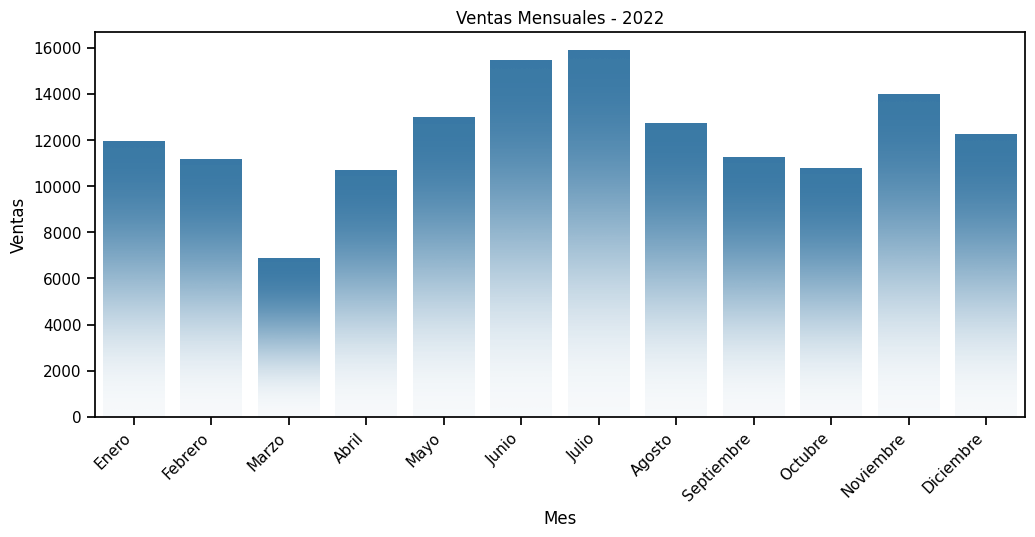

In [41]:
# Ventas mensuales del año 2022

fig_bivar = plt.figure(figsize=(12, 5))
seg_order = ['A', 'B', 'C']

# debido a la presencia del valor negativo, vamos a prescindir de ese valor para tener una mejor visualizacion
ventas_df_22_1 = ventas_df_22.copy()
ventas_df_22_1 = ventas_df_22_1[ventas_df_22_1['Ventas_Cliente'] >= 0]


ventas22 = fig_bivar.add_subplot(1, 1, 1)
sns.barplot(x='Mes_Venta', y='Ventas_Cliente', data=ventas_df_22_1, ax=ventas22, errorbar=None, hue_order=seg_order)
ventas22.set_title('Ventas Mensuales - 2022')
ventas22.set(xlabel='Mes', ylabel='Ventas')
ventas22.set_xticks(range(len(months)))
ventas22.set_xticklabels(months, rotation=45, ha='right')
bars = ventas22.patches
mplcyberpunk.add_bar_gradient(bars=bars)
plt.show()


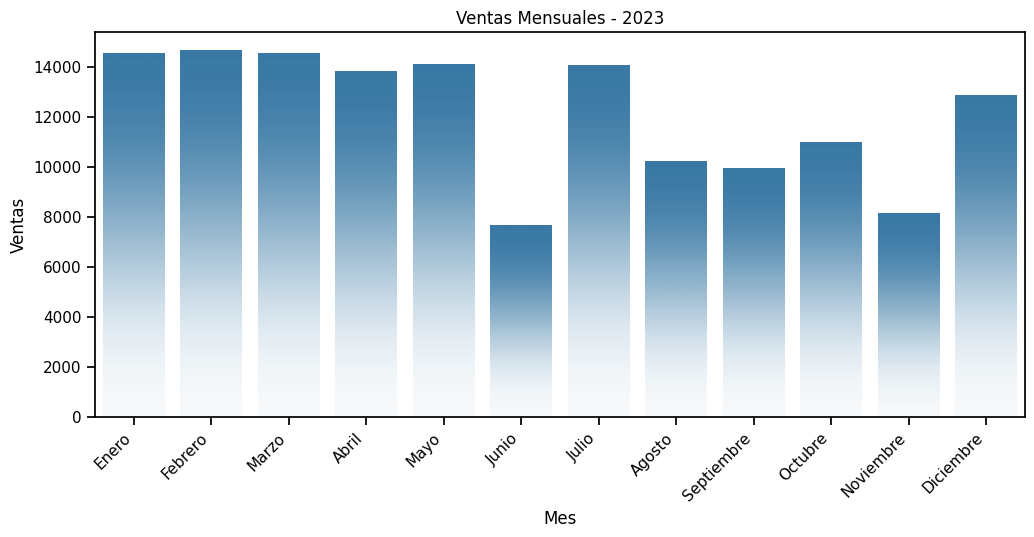

In [42]:
# Ventas mensuales del año 2022

fig_bivar = plt.figure(figsize=(12, 5))
seg_order = ['A', 'B', 'C']

# Conteo de ventas realizadas por mes el año 2023

ventas23 = fig_bivar.add_subplot(1, 1, 1)
sns.barplot(x='Mes_Venta', y='Ventas_Cliente', data=ventas_df_23, ax=ventas23, errorbar=None, hue_order=seg_order)
ventas23.set_title('Ventas Mensuales - 2023')
ventas23.set(xlabel='Mes', ylabel='Ventas')
ventas23.set_xticks(range(len(months)))
ventas23.set_xticklabels(months, rotation=45, ha='right')
bars = ventas23.patches
mplcyberpunk.add_bar_gradient(bars=bars)
plt.show()

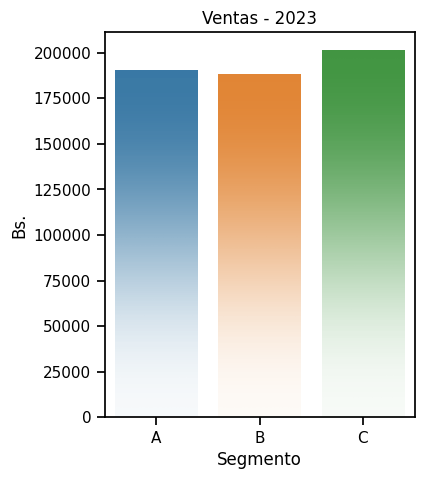

In [59]:
# Calcular la suma de las ventas por segmento
sum_ventas_df = ventas_df_22_1.groupby('Segmento')['Ventas_Cliente'].sum().reset_index()

fig_bivar = plt.figure(figsize=(4, 5))
seg23 = fig_bivar.add_subplot(1, 1, 1)

sns.barplot(x='Segmento', y='Ventas_Cliente', hue='Segmento', data=sum_ventas_df, ax=seg23, hue_order=seg_order, dodge=False)

seg23.set_title('Ventas - 2023')
seg23.set(xlabel='Segmento', ylabel='Bs.')
seg23.set_xticks(range(len(seg_order)))
seg23.set_xticklabels(seg_order)
bars = seg23.patches
mplcyberpunk.add_bar_gradient(bars=bars)

plt.show()

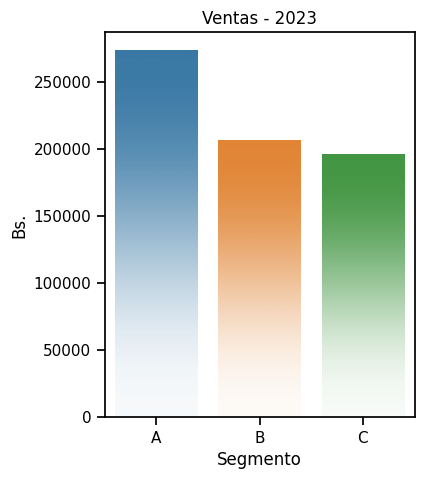

In [60]:
sum_ventas_df_23 = ventas_df_23.groupby('Segmento')['Ventas_Cliente'].sum().reset_index()

fig_bivar = plt.figure(figsize=(4, 5))
seg23 = fig_bivar.add_subplot(1, 1, 1)

sns.barplot(x='Segmento', y='Ventas_Cliente', hue='Segmento', data=sum_ventas_df_23, ax=seg23, hue_order=seg_order, dodge=False)
seg23.set_title('Ventas - 2023')
seg23.set(xlabel='Segmento', ylabel='Bs.')
seg23.set_xticks(range(len(seg_order)))
seg23.set_xticklabels(seg_order)
bars = seg23.patches
mplcyberpunk.add_bar_gradient(bars=bars)

# Mostrar el gráfico
plt.show()


#### _2. Variables Cuantitativas_

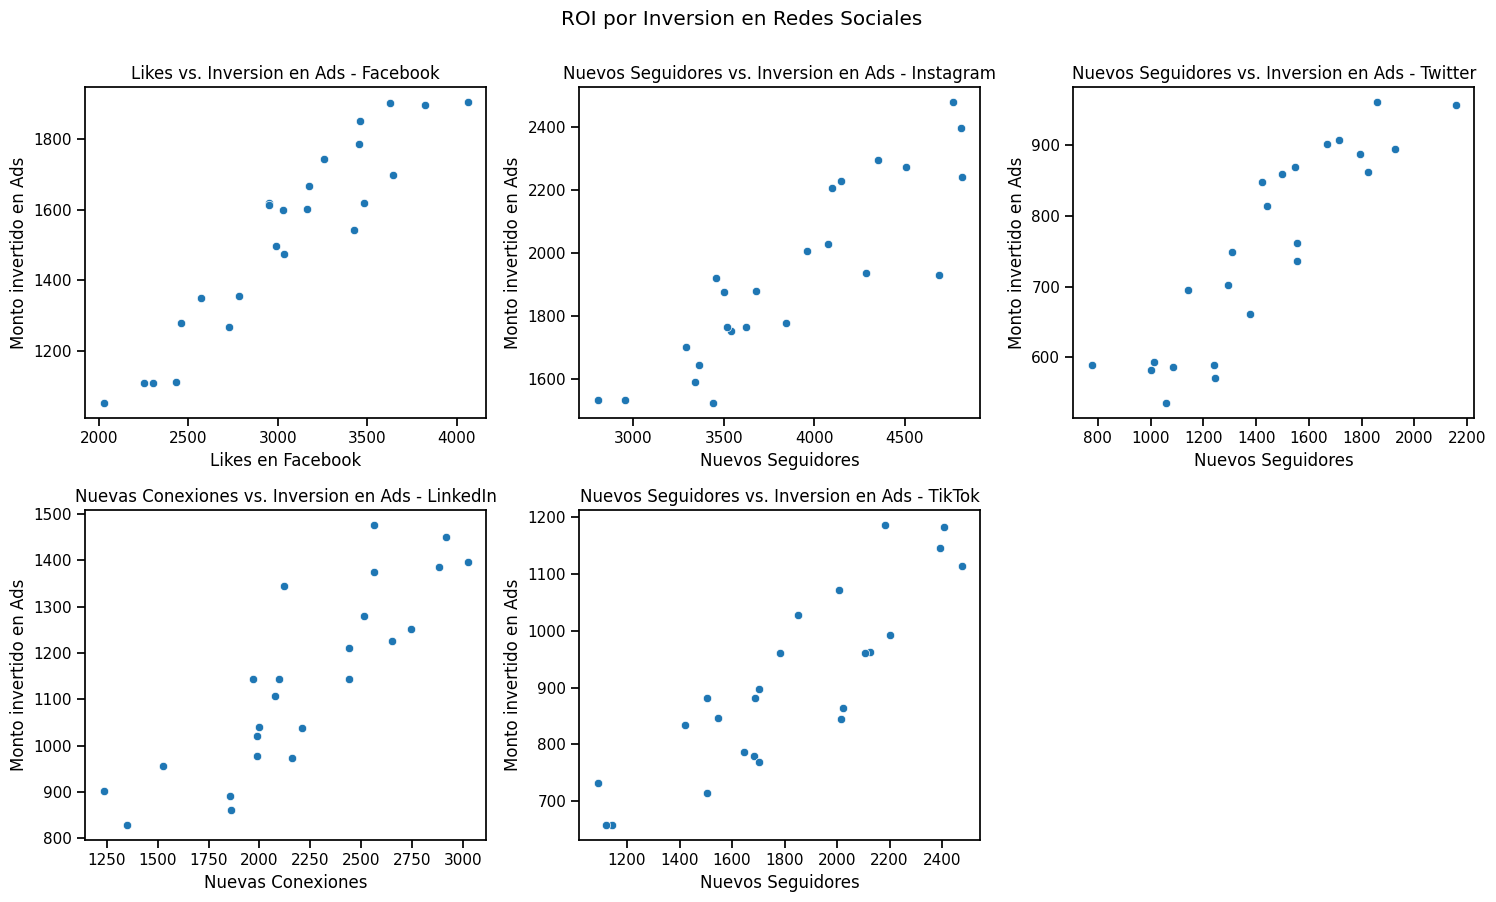

In [45]:
fig_RS= plt.figure(figsize=(15, 10))

# Relacion entre 'Facebook_Likes' y 'Facebook_Ads'
Fb1 = fig_RS.add_subplot(2, 3, 1)
sns.scatterplot(x='Facebook_Likes', y='Facebook_Ads', data=social_media_df)
Fb1.set_title('Likes vs. Inversion en Ads - Facebook')
Fb1.set_xlabel('Likes en Facebook')
Fb1.set_ylabel('Monto invertido en Ads')

# Relacion entre 'Instagram_Followers' y 'Instagram_Ads'
Ins1 = fig_RS.add_subplot(2 , 3, 2)
sns.scatterplot(x='Instagram_Followers', y='Instagram_Ads', data=social_media_df)
Ins1.set_title('Nuevos Seguidores vs. Inversion en Ads - Instagram')
Ins1.set_xlabel('Nuevos Seguidores')
Ins1.set_ylabel('Monto invertido en Ads')

# Relacion entre 'Twitter_Followers' y 'Twitter_Ads'
Twt1 = fig_RS.add_subplot(2 , 3, 3)
sns.scatterplot(x='Twitter_Followers', y='Twitter_Ads', data=social_media_df)
Twt1.set_title('Nuevos Seguidores vs. Inversion en Ads - Twitter')
Twt1.set_xlabel('Nuevos Seguidores')
Twt1.set_ylabel('Monto invertido en Ads')

# Relacion entre 'LinkedIn_Connections' y 'LinkedIn_Ads'
Lkd1 = fig_RS.add_subplot(2 ,3, 4)
sns.scatterplot(x='LinkedIn_Connections', y='LinkedIn_Ads', data=social_media_df)
Lkd1.set_title('Nuevas Conexiones vs. Inversion en Ads - LinkedIn')
Lkd1.set_xlabel('Nuevas Conexiones')
Lkd1.set_ylabel('Monto invertido en Ads')

# Relacion entre 'TikTok_Followers' y 'TikTok_Ads'
Tkt1 = fig_RS.add_subplot(2 ,3, 5)
sns.scatterplot(x='TikTok_Followers', y='TikTok_Ads', data=social_media_df)
Tkt1.set_title('Nuevos Seguidores vs. Inversion en Ads - TikTok')
Tkt1.set_xlabel('Nuevos Seguidores')
Tkt1.set_ylabel('Monto invertido en Ads')

fig_RS.suptitle('ROI por Inversion en Redes Sociales', y=0.90)
plt.tight_layout(rect=[0, 0, 1, 0.90]) 
plt.show()


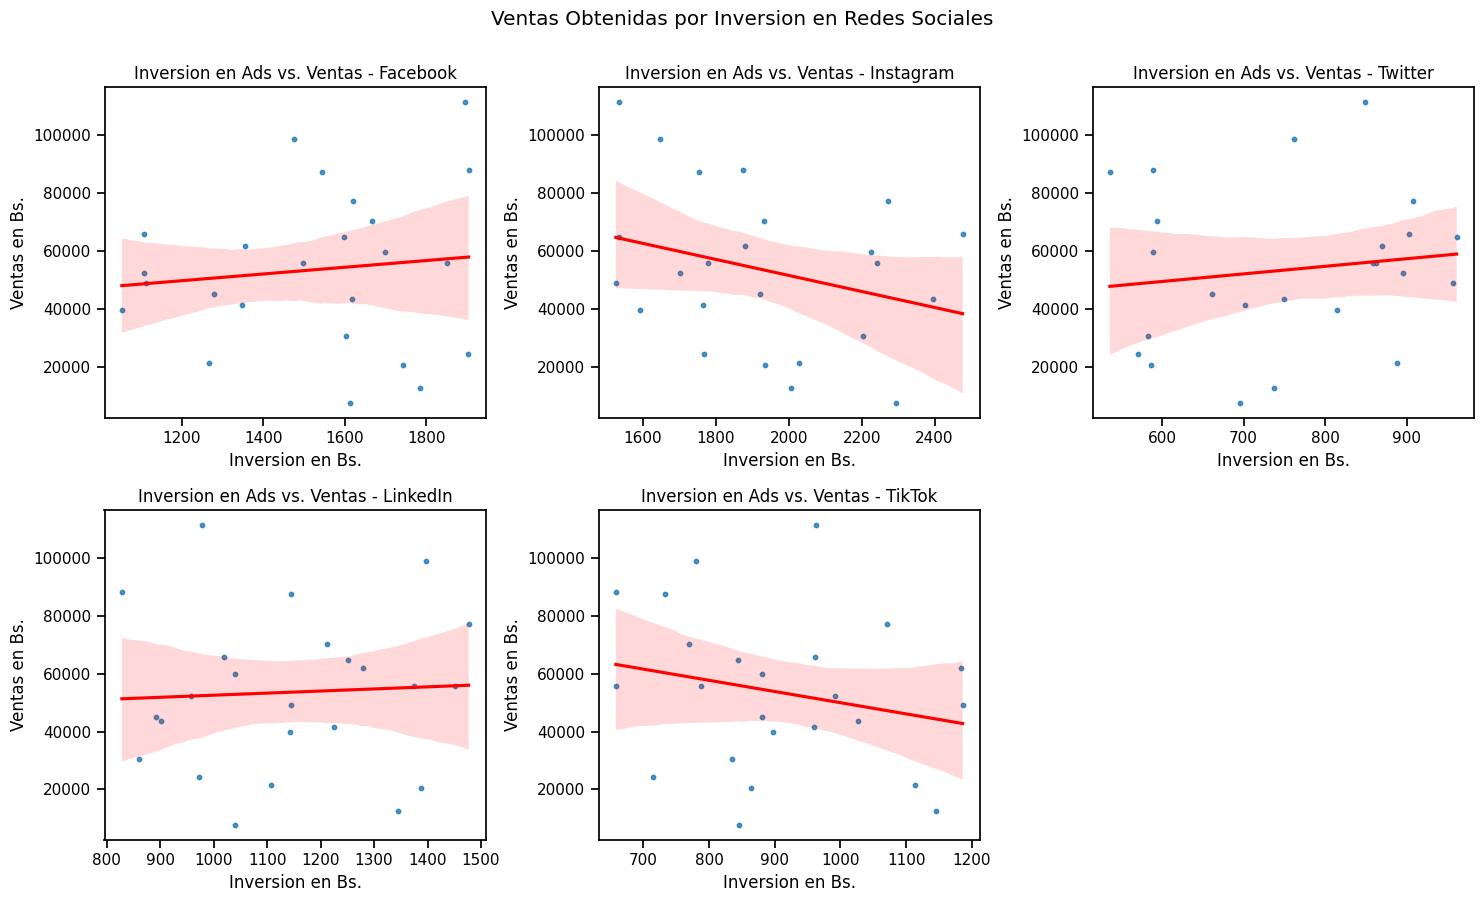

In [46]:
# Ya que el outlier no es representativo de nuestros datos utilizamos el data frame creado con los outliers negativos tratados 'social_media_df_1' 

fig_RS = plt.figure(figsize=(15, 10))

# Relacion entre 'Facebook_Ads' y 'Ventas_Totales'
Fb1 = fig_RS.add_subplot(2, 3, 1)
sns.regplot(x='Facebook_Ads', y='Ventas_Totales', data=social_media_df_1, scatter_kws={'s':10}, line_kws={'color':'red'})
Fb1.set_title('Inversion en Ads vs. Ventas - Facebook')
Fb1.set_xlabel('Inversion en Bs.')
Fb1.set_ylabel('Ventas en Bs.')

# Relacion entre 'Instagram_Ads' y 'Ventas_Totales'
Ins1 = fig_RS.add_subplot(2, 3, 2)
sns.regplot(x='Instagram_Ads', y='Ventas_Totales', data=social_media_df_1, scatter_kws={'s':10}, line_kws={'color':'red'})
Ins1.set_title('Inversion en Ads vs. Ventas - Instagram')
Ins1.set_xlabel('Inversion en Bs.')
Ins1.set_ylabel('Ventas en Bs.')

# Relacion entre 'Twitter_Ads' y 'Ventas_Totales'
Twt1 = fig_RS.add_subplot(2, 3, 3)
sns.regplot(x='Twitter_Ads', y='Ventas_Totales', data=social_media_df_1, scatter_kws={'s':10}, line_kws={'color':'red'})
Twt1.set_title('Inversion en Ads vs. Ventas - Twitter')
Twt1.set_xlabel('Inversion en Bs.')
Twt1.set_ylabel('Ventas en Bs.')

# Relacion entre 'LinkedIn_Ads' y 'Ventas_Totales'
Lkd1 = fig_RS.add_subplot(2, 3, 4)
sns.regplot(x='LinkedIn_Ads', y='Ventas_Totales', data=social_media_df_1, scatter_kws={'s':10}, line_kws={'color':'red'})
Lkd1.set_title('Inversion en Ads vs. Ventas - LinkedIn')
Lkd1.set_xlabel('Inversion en Bs.')
Lkd1.set_ylabel('Ventas en Bs.')

# Relacion entre 'TikTok_Ads' y 'Ventas_Totales'
Tkt1 = fig_RS.add_subplot(2, 3, 5)
sns.regplot(x='TikTok_Ads', y='Ventas_Totales', data=social_media_df_1, scatter_kws={'s':10}, line_kws={'color':'red'})
Tkt1.set_title('Inversion en Ads vs. Ventas - TikTok')
Tkt1.set_xlabel('Inversion en Bs.')
Tkt1.set_ylabel('Ventas en Bs.')

fig_RS.suptitle('Ventas Obtenidas por Inversion en Redes Sociales', y=0.90)
plt.tight_layout(rect=[0, 0, 1, 0.90]) 
plt.show()


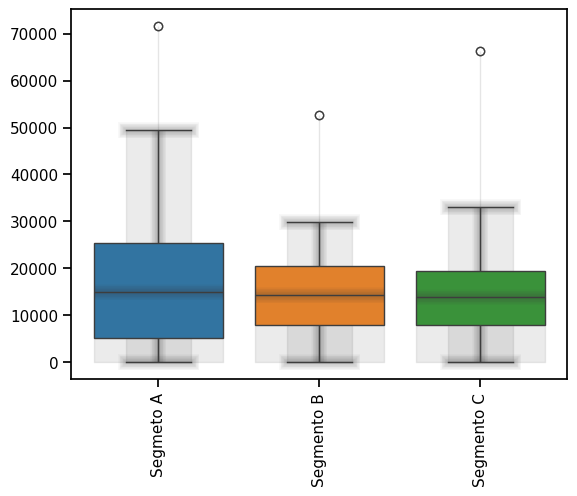

In [47]:
quantitative_var3 = ['Ventas_Seg_A', 'Ventas_Seg_B', 'Ventas_Seg_C']

base3 = social_media_df_1[quantitative_var3]
sns.boxplot(data=base3)
new_labels = ['Segmeto A', 'Segmento B', 'Segmento C']
plt.xticks(ticks=range(len(quantitative_var3)), labels=new_labels, rotation=90)
mplcyberpunk.add_glow_effects()

plt.show()

### _Podemos observar que en los 3 segmentos existe un valor similar en la mediana lo que significa que en promedio mensual se obtienen montos de ventas similares de los 3 segmentos._
### _Sin embargo podemos observar que el segmento A es el que representa mayor cantidad de montos por ventas_

In [48]:
social_media_df.columns

Index(['Mes', 'Facebook_Likes', 'Instagram_Followers', 'Twitter_Followers',
       'LinkedIn_Connections', 'TikTok_Followers', 'Facebook_Ads',
       'Instagram_Ads', 'Twitter_Ads', 'LinkedIn_Ads', 'TikTok_Ads',
       'Ventas_Seg_A', 'Ventas_Seg_B', 'Ventas_Seg_C', 'Ventas_Totales'],
      dtype='object')

## _Correlacion entre Variables_

### _Visualizamos la correlacion entre variables de Inversion y Metricas_

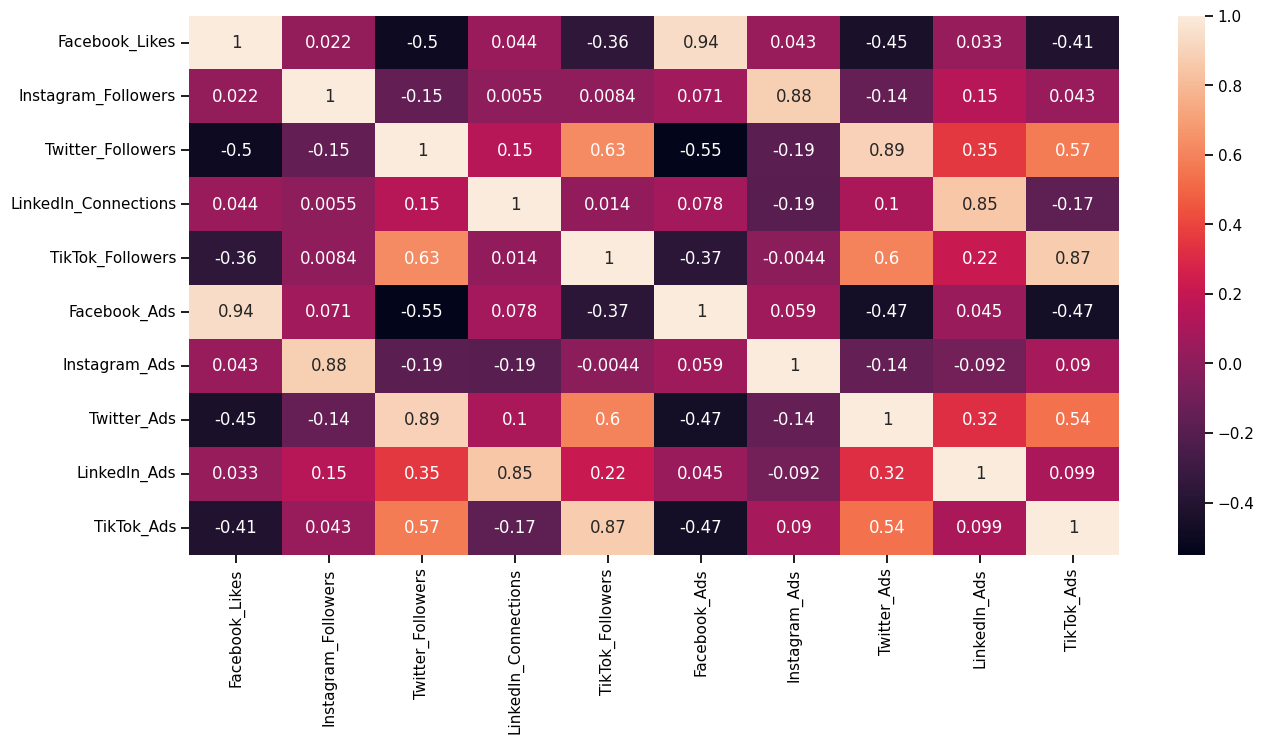

In [49]:
social_media_var0 = ['Facebook_Likes', 'Instagram_Followers', 'Twitter_Followers',
                    'LinkedIn_Connections', 'TikTok_Followers', 'Facebook_Ads', 'Instagram_Ads', 
                    'Twitter_Ads', 'LinkedIn_Ads', 'TikTok_Ads']
corr_sm0 = social_media_df[social_media_var0].corr(method='pearson')

plt.figure(figsize=(15, 7))
sns.heatmap(corr_sm0, annot=True)
plt.show()

### _Visualizamos la correlacion entre variables de inversion y ventas_

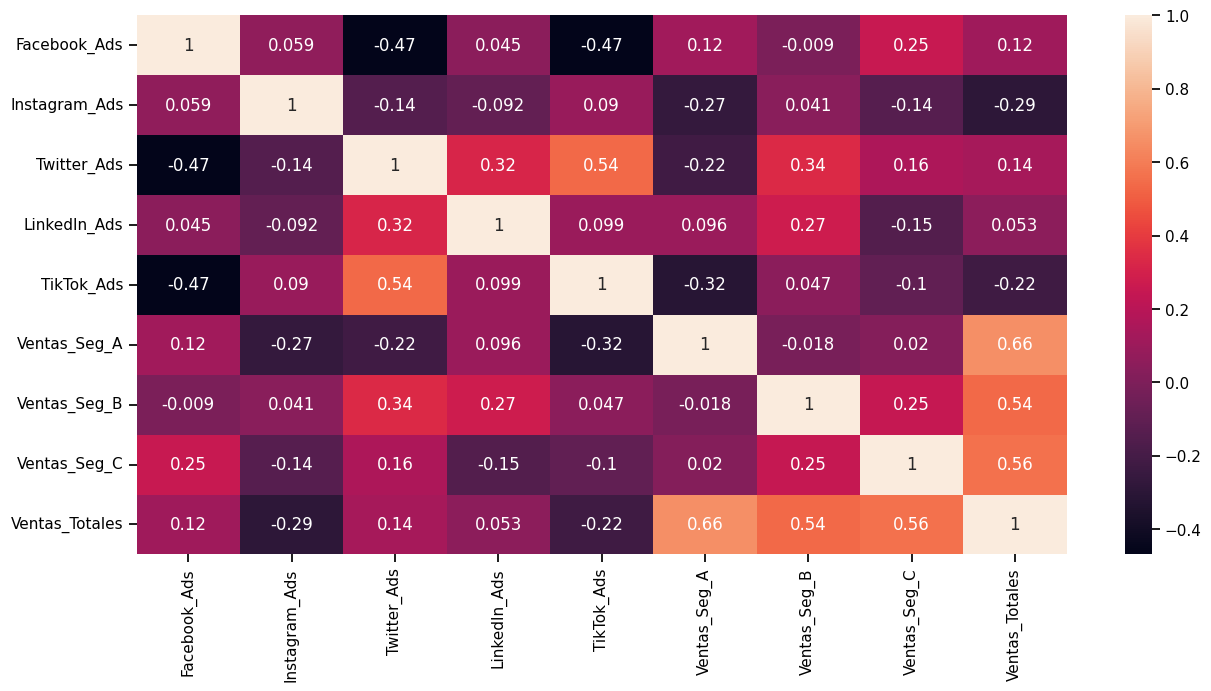

In [50]:
# Ya que el outlier no es representativo de nuestros datos utilizamos el data frame creado con los outliers negativos tratados 'social_media_df_1'
# para poder visualizar la correlacion entre variables ante un comportamiento "Normal" en las ventas

social_media_var1 = ['Facebook_Ads', 'Instagram_Ads', 
                    'Twitter_Ads', 'LinkedIn_Ads', 'TikTok_Ads', 'Ventas_Seg_A', 'Ventas_Seg_B', 'Ventas_Seg_C', 'Ventas_Totales']
corr_sm1 = social_media_df_1[social_media_var1].corr(method='pearson')

plt.figure(figsize=(15, 7))
sns.heatmap(corr_sm1, annot=True)
plt.show()

### _Analisis Multivariado_ 

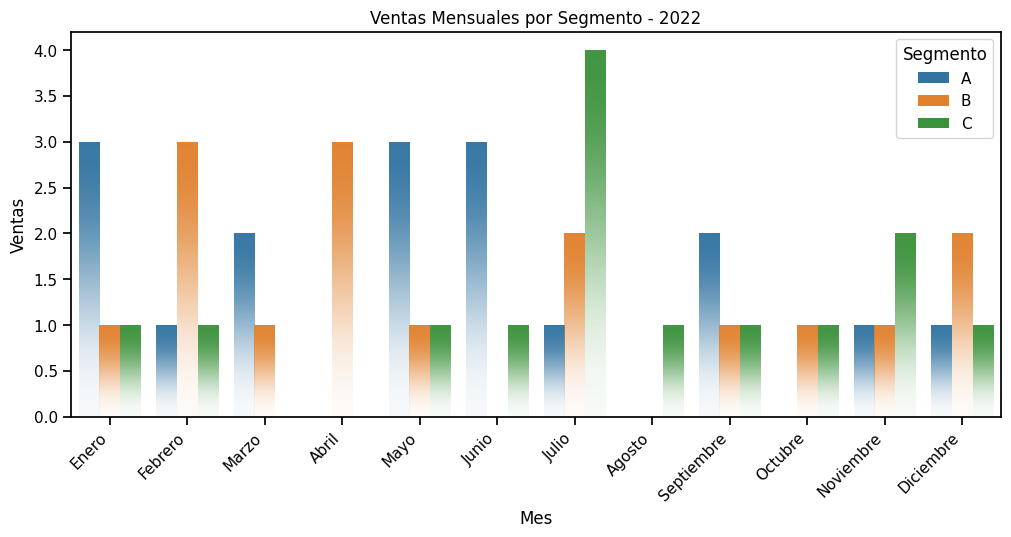

In [51]:
fig_bivar = plt.figure(figsize=(12, 5))
seg_order = ['A', 'B', 'C']

# Conteo de ventas realizadas por mes por segmento el año 2022

conteo_clientes_22 = ventas_df_22.groupby(['Mes_Venta', 'Segmento']).size().reset_index(name='Conteo_Clientes')

seg22 = fig_bivar.add_subplot(1, 1, 1)
sns.barplot(x='Mes_Venta', y='Conteo_Clientes', hue='Segmento', data=conteo_clientes_22, ax=seg22, errorbar=None, hue_order=seg_order)
seg22.set_title('Ventas Mensuales por Segmento - 2022')
seg22.set(xlabel='Mes', ylabel='Ventas')
seg22.set_xticks(range(len(months)))
seg22.set_xticklabels(months, rotation=45, ha='right')
bars = seg22.patches
mplcyberpunk.add_bar_gradient(bars=bars)
plt.show()


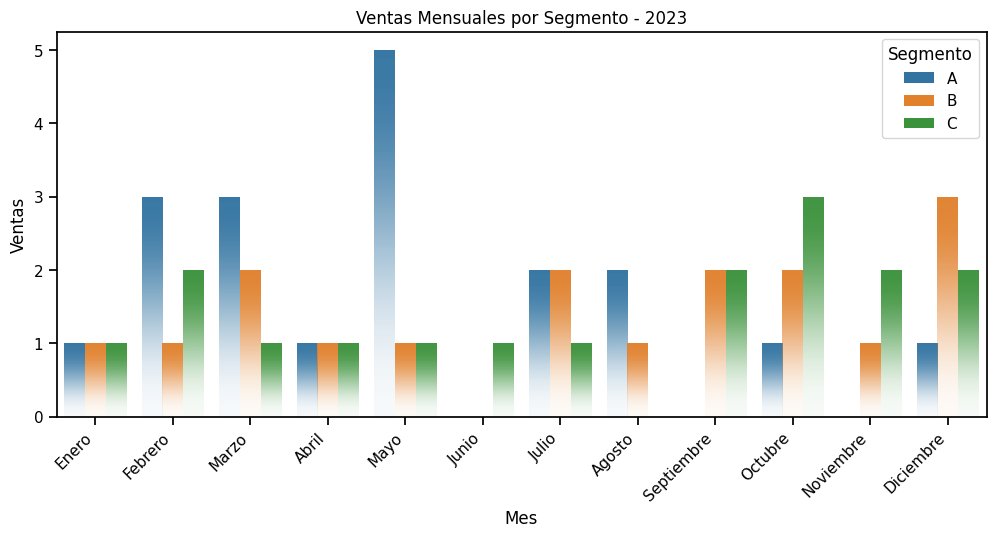

In [52]:
fig_bivar = plt.figure(figsize=(12, 5))
seg_order = ['A', 'B', 'C']

# Conteo de ventas realizadas por mes por segmento el año 2023

conteo_clientes_23 = ventas_df_23.groupby(['Mes_Venta', 'Segmento']).size().reset_index(name='Conteo_Clientes')

seg23 = fig_bivar.add_subplot(1, 1, 1)
sns.barplot(x='Mes_Venta', y='Conteo_Clientes', hue='Segmento', data=conteo_clientes_23, ax=seg23, errorbar=None, hue_order=seg_order)
seg23.set_title('Ventas Mensuales por Segmento - 2023')
seg23.set(xlabel='Mes', ylabel='Ventas')
seg23.set_xticks(range(len(months)))
seg23.set_xticklabels(months, rotation=45, ha='right')
bars = seg23.patches
mplcyberpunk.add_bar_gradient(bars=bars)
plt.show()